In [1]:
from rsna_retro.imports import *
from rsna_retro.metadata import *
from rsna_retro.preprocess import *
from rsna_retro.train import *
from rsna_retro.train3d import *
from rsna_retro.seutao import *

Loading imports


In [2]:
torch.cuda.set_device(4)

In [3]:
# dls = get_seutao_dls(Meta.df_comb1, np_file, csv_file, bs=64)
dls = get_seutao_dls_meta(Meta.df_comb1, np_file, csv_file, bs=64)

loading features
Done loading features


## Load

In [4]:
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [5]:
class SeqHead(nn.Module):
    def __init__(self):
        super().__init__()
#         d_model = 2048+6+1
        d_model = 2048
        n_head = 4
#         self.linear = nn.Linear(d_model+7, d_model)
        encoder_layers = TransformerEncoderLayer(d_model, n_head, d_model*2)
        self.transformer = TransformerEncoder(encoder_layers, 4)
        
        self.head = nn.Sequential(nn.Linear(d_model,6))
        
    def forward(self, x):
        x = x[0]
#         x = torch.cat(x, axis=-1)
#         x = self.linear(x)
        feat = self.transformer(x.transpose(0,1))
        return self.head(feat.transpose(0,1))

In [6]:
m = SeqHead().cuda()

In [7]:
name = 'seutao_transformer'

In [8]:
learn = get_learner(dls, m)

In [9]:
learn.add_cb(DePadLoss())

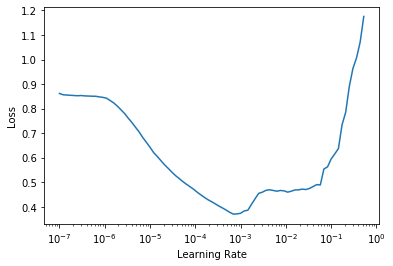

In [9]:
learn.lr_find()

## Train

In [ ]:
do_fit(learn, 10, 1e-4)
learn.save(f'runs/{name}-1')

In [24]:
do_fit(learn, 4, 1e-5)
learn.save(f'runs/{name}-2')

## Submit

In [11]:
submit_predictions(m, f'runs/{name}-1', f'subm/{name}', 'testing seutao features - transformer', dfunc=get_seutao_dls_meta)

loading features
Done loading features


100%|██████████| 26.0M/26.0M [00:02<00:00, 10.9MB/s]


In [13]:
api.competitions_submissions_list('rsna-intracranial-hemorrhage-detection')[0]

{'ref': 14277022,
 'totalBytes': 27277209,
 'date': '2020-01-23T21:29:02.407Z',
 'description': 'testing seutao features - transformer',
 'errorDescription': None,
 'fileName': 'seutao_transformer.csv',
 'publicScore': '1.31036',
 'privateScore': '0.09217',
 'status': 'complete',
 'submittedBy': 'Andrew Shaw',
 'submittedByRef': 'bearpelican',
 'teamName': 'Andrew Shaw',
 'type': 'standard',
 'url': 'https://www.kaggle.com/submissions/14277022/14277022.raw'}